# CS-UY 3943 - Introduction of Data Science
## Week 6: Data Visualization

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name: Lenny Remache
NetID: ljr381
Group (Letter): D 
Group Member 1: Amy (mtk367)
Group Member 2:  Jimena (jgc423)
***

1\. Heatmap's are useful for visualizing relationships between two or more variables in a dataset. The file **demo.txt** contains demographic data for a number of countries. The demographic categories include population, mortality rate, life expectancy, and other characteristics about each country. In addition to these demographics, the countries are classified by the area on the continent on which it is located. Given this data, use the `seaborn` library to generate the following plot. Use `Blues` as the `cmap` parameter for generating your heatmap.

![Heatmap](heatmap.png)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('demo.txt',delimiter=';')
df = df.set_index(df['Country'])

In [4]:
new_df = df[df['Group'] == 'Middle']
new_df.head(10)

,Country,Pop,Birth rate,Mortality rate,Life expectancy,Infant mortality,Children per woman,Growth rate,Population aged 65+,Group,Continent
Country,,,,,,,,,,,
Angola,Angola,27498,43.6,12.6,53.9,86.8,5.75,31.0,658,Middle,Africa
Cameroon,Cameroon,25112,34.7,10.5,57.2,64.6,4.42,24.0,805,Middle,Africa
Central African Republic,Central African Republic,5201,32.2,12.9,53.5,82.7,3.98,19.8,202,Middle,Africa
Chad,Chad,15444,43.4,13.1,52.7,85.9,5.74,31.3,383,Middle,Africa
Congo,Congo,4996,34.5,7.7,64.2,42.8,4.62,26.2,186,Middle,Africa
Democratic Republic of the Congo,Democratic Republic of the Congo,84825,40.2,9.5,60.1,65.4,5.62,30.8,252,Middle,Africa
Equatorial Guinea,Equatorial Guinea,920,33.3,10.2,58.8,61.2,4.48,27.5,29,Middle,Africa
Gabon,Gabon,184,28.2,7.8,66.2,36.7,3.65,20.9,92,Middle,Africa
Sao Tome and Principe,Sao Tome and Principe,203,32.0,6.5,67.0,41.0,4.33,20.5,6,Middle,Africa


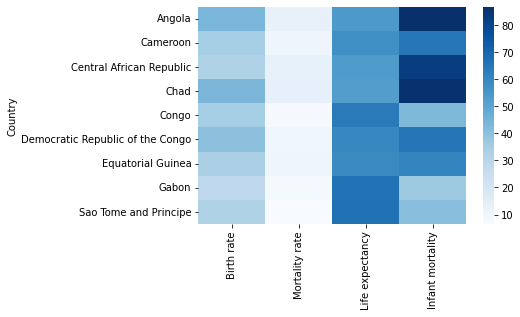

In [5]:
rate_df = new_df[['Birth rate','Mortality rate','Life expectancy','Infant mortality']]
sns.heatmap(data=rate_df,cmap='Blues')

plt.show()

2\. Continuing with the demographic data, it might interesting to understand the relationship between life expectancy and birth rate across different continents. Create a scatter plot to explore this relationship by continent as shown in the plot below.

![Birth rate/Life expectancy scatter plot](scatter_lifeexp_birthrate.png)

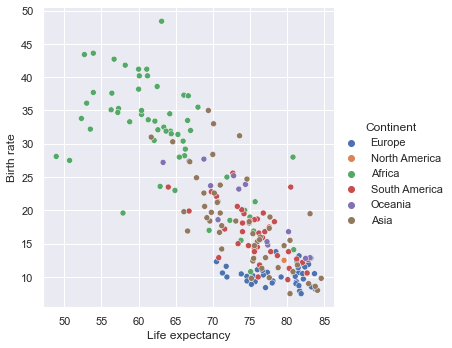

In [6]:
sns.set()
sns.relplot(data=df,x='Life expectancy',y='Birth rate',kind='scatter',hue='Continent')

plt.show()

3\. Unfortunately, the scatter plot is a little difficult to interpret. In order to better tease apart the relationships, provide individual subplots for each **region** that contains more than 9 countries in the dataset as shown in the image below.

![Life Exp/Birth Rate by Region](region_lifeexp_birthrate.png)

In [7]:
df['Region'] = df['Group'] + ' ' + df['Continent']
df.head()

,Country,Pop,Birth rate,Mortality rate,Life expectancy,Infant mortality,Children per woman,Growth rate,Population aged 65+,Group,Continent,Region
Country,,,,,,,,,,,,
Channel Islands,Channel Islands,166,9.280,9.140,81.269,7.276,1.492,4.56,30,North,Europe,North Europe
Denmark,Denmark,5733,10.707,9.620,80.839,3.495,1.758,3.67,1132,North,Europe,North Europe
Estonia,Estonia,1302,10.698,12.657,77.342,2.843,1.657,-2.63,256,North,Europe,North Europe
Finland,Finland,5556,10.672,9.865,81.576,1.839,1.764,2.65,1212,North,Europe,North Europe
Iceland,Iceland,337,12.836,6.467,83.220,1.752,1.893,7.83,50,North,Europe,North Europe


In [8]:
temp_df = df['Region'].value_counts()
temp_df

East Africa                    20
West Asia                      18
Caribean South America         17
West Africa                    16
South-Central Asia             14
South South America            13
South Europe                   12
South-East Asia                11
North Europe                   11
East Europe                    10
Middle Africa                   9
Central South America           8
East Asia                       8
North Africa                    7
West Europe                     7
South Africa                    5
Melanesia Oceania               5
Micronesia Oceania              3
Polynesia Oceania               3
North America North America     2
AusNZ Oceania                   2
Name: Region, dtype: int64

In [9]:
region_df = df["Region"].isin(["East Africa", "West Asia",'Caribean South America','West Africa','South-Central Asia','South South America','South Europe','South-East Asia','North Europe','East Europe'])

curr_df = df[region_df]
curr_df.head()

,Country,Pop,Birth rate,Mortality rate,Life expectancy,Infant mortality,Children per woman,Growth rate,Population aged 65+,Group,Continent,Region
Country,,,,,,,,,,,,
Channel Islands,Channel Islands,166,9.280,9.140,81.269,7.276,1.492,4.56,30,North,Europe,North Europe
Denmark,Denmark,5733,10.707,9.620,80.839,3.495,1.758,3.67,1132,North,Europe,North Europe
Estonia,Estonia,1302,10.698,12.657,77.342,2.843,1.657,-2.63,256,North,Europe,North Europe
Finland,Finland,5556,10.672,9.865,81.576,1.839,1.764,2.65,1212,North,Europe,North Europe
Iceland,Iceland,337,12.836,6.467,83.220,1.752,1.893,7.83,50,North,Europe,North Europe


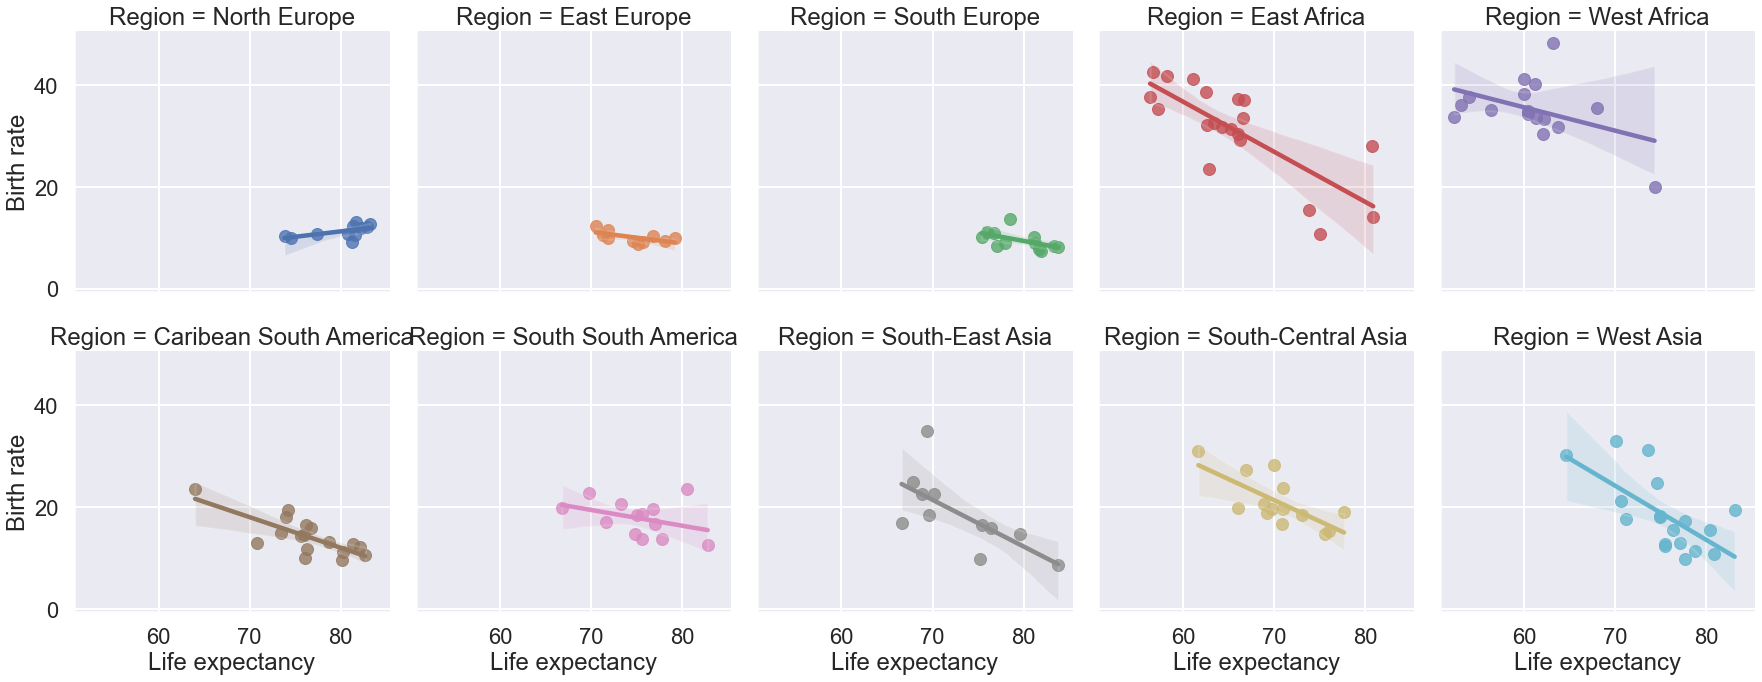

In [10]:
sns.set()
sns.set_context('poster')
sns.lmplot(data=curr_df, x="Life expectancy", y="Birth rate", col='Region',col_wrap=5, hue='Region')

4\. In order to identify features of the dataset that may be predictive of other features, a heatmap of correlation values for each feature could be generated. However, you would like to present these results in a different way using `seaborn`'s advanced visualization techniques. Create a figure with scatter subplots for each pair of quantitative variables in the dataset along with a linear regression line. Use the diagonal to display a kernel density estimate plot for each quantitative variable in the dataset. Visiting the `seaborn` [documentation](https://seaborn.pydata.org/index.html) may be helpful for this question.

![Quantitative Variable Relationships](qvar_relations.png)

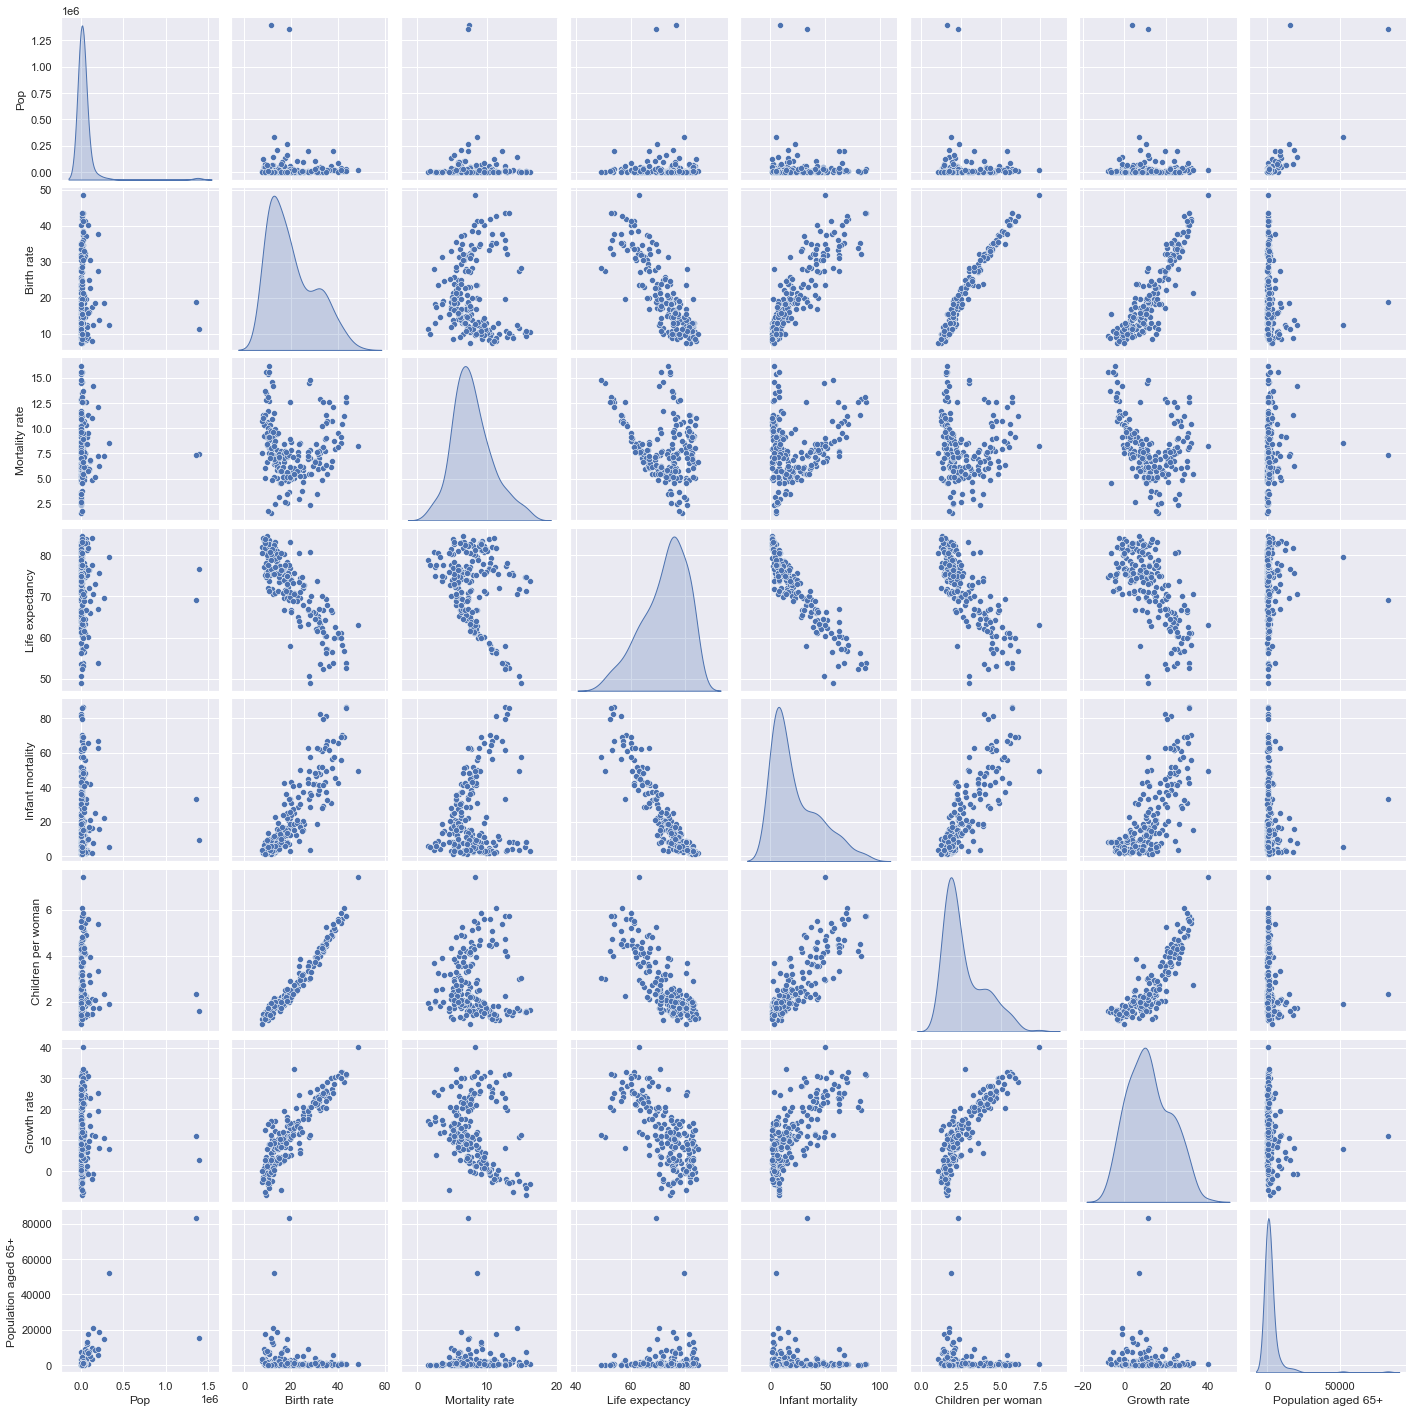

In [11]:
sns.set()
sns.pairplot(df,diag_kind='kde')
plt.show()

5\. The plot generated for Question 4 makes it clear that some of the quantitative features seem to have linear relationships and some quantitative features do not seem to have any relationship. Some pairings appear to have relationships that are non-linear. Generate a plot that focuses on one of the most interesting non-linear relationships observed in the pairings: `Children per woman` (also known as fertility rate) and `Mortality rate`. Include a green scatter plot with histograms along the marginal axes for the univariate distributions as well as a polynomial regression line of order 2 as shown below.

![Nonlinear relationship](nonlinear.png)

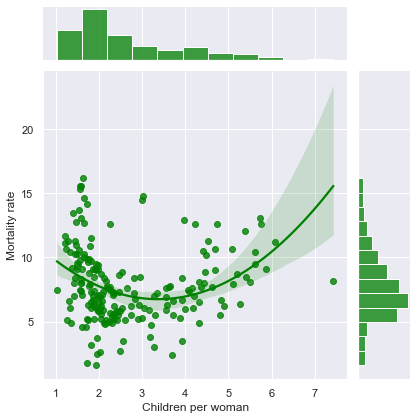

In [23]:
g = sns.jointplot(data=df, x="Children per woman", y="Mortality rate",marginal_kws={'kde':False},order=2,kind='reg',color='green') 

6\. Each country in this data set contains a growth rate. To get an understanding of how the growth rates are distributed by country on each continent, create a box and whisker plot showing the growth rate distribution for each continent. Rotate the x-axis labels so that each continent name is clearly visible and add a title to your figure that does not overlap the plot area. (Consult the seaborn [documentation](https://seaborn.pydata.org/index.html) if you are unsure how to manipulate the title location).

![Growth Rate By Continent](growth_rate.png)

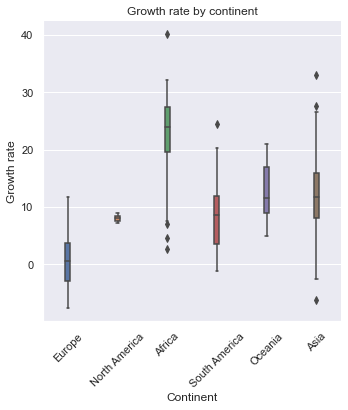

In [222]:
sns.set()
sns.catplot(data=df,x='Continent',y='Growth rate',kind='box', width=0.1)
plt.xticks(rotation=45)
plt.title('Growth rate by continent')
plt.show()